In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

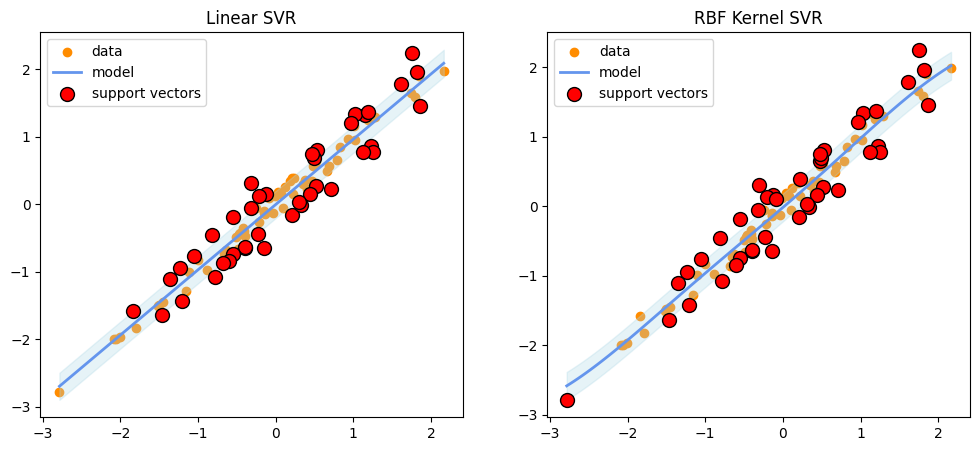

"\nKey Concepts:\n1. Epsilon-Insensitive Tube (ε-tube):\n   - All predictions within ε distance from true value are not penalized\n   - Controls model's tolerance to errors\n   - Larger ε => flatter functions, fewer support vectors\n\n2. Support Vectors:\n   - Points lying outside the ε-tube\n   - Only these points affect the model's coefficients\n\n3. Kernel Trick:\n   - Same principle as SVM classification\n   - Allows modeling non-linear relationships\n"

In [3]:
# ================================================
# 1. Basic SVR Concept with Epsilon-Insensitive Tube
# ================================================

# Generate synthetic data
X_reg, y_reg = make_regression(n_samples=100, n_features=1,
                              noise=10, random_state=42)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)
y_scaled = (y_reg - y_reg.mean()) / y_reg.std()

# Create SVR models with different parameters
svr_linear = SVR(kernel='linear', C=100, epsilon=0.2)
svr_rbf = SVR(kernel='rbf', C=100, epsilon=0.2, gamma=0.1)

# Fit models
svr_linear.fit(X_scaled, y_scaled)
svr_rbf.fit(X_scaled, y_scaled)

# Function to plot SVR results
def plot_svr(model, X, y, title):
    plt.scatter(X, y, color='darkorange', label='data')
    x_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_test)

    plt.plot(x_test, y_pred, color='cornflowerblue',
             label='model', linewidth=2)

    # Plot epsilon tube
    plt.fill_between(x_test.ravel(),
                     y_pred - model.epsilon,
                     y_pred + model.epsilon,
                     color='lightblue', alpha=0.3)

    # Plot support vectors
    plt.scatter(X[model.support_], y[model.support_],
                color='red', s=100,
                label='support vectors',
                edgecolors='k')

    plt.title(title)
    plt.legend()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_svr(svr_linear, X_scaled, y_scaled, "Linear SVR")
plt.subplot(1, 2, 2)
plot_svr(svr_rbf, X_scaled, y_scaled, "RBF Kernel SVR")
plt.show()

"""
Key Concepts:
1. Epsilon-Insensitive Tube (ε-tube):
   - All predictions within ε distance from true value are not penalized
   - Controls model's tolerance to errors
   - Larger ε => flatter functions, fewer support vectors

2. Support Vectors:
   - Points lying outside the ε-tube
   - Only these points affect the model's coefficients

3. Kernel Trick:
   - Same principle as SVM classification
   - Allows modeling non-linear relationships
"""



'\nObservations:\n- Smaller ε:\n  - Tighter tube, more sensitive to errors\n  - More complex model (potential overfitting)\n  - More support vectors\n\n- Larger ε:\n  - Wider tube, more error tolerance\n  - Simpler model (potential underfitting)\n  - Fewer support vectors\n'

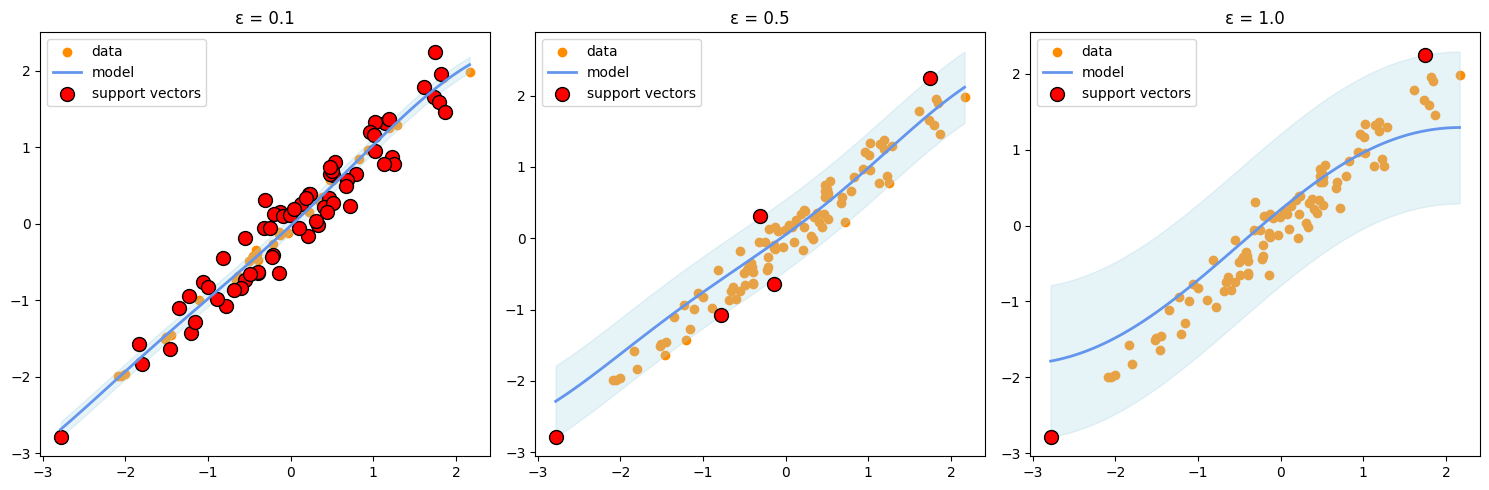

In [4]:
# ================================================
# 2. Effect of Epsilon (ε) Parameter
# ================================================

epsilon_values = [0.1, 0.5, 1.0]
plt.figure(figsize=(15, 5))

for i, eps in enumerate(epsilon_values):
    model = SVR(kernel='rbf', C=100, epsilon=eps, gamma=0.1)
    model.fit(X_scaled, y_scaled)

    plt.subplot(1, 3, i+1)
    plot_svr(model, X_scaled, y_scaled, f"ε = {eps}")
    plt.tight_layout()

"""
Observations:
- Smaller ε:
  - Tighter tube, more sensitive to errors
  - More complex model (potential overfitting)
  - More support vectors

- Larger ε:
  - Wider tube, more error tolerance
  - Simpler model (potential underfitting)
  - Fewer support vectors
"""



'\nObservations:\n- Small C:\n  - High regularization\n  - Smoother decision function\n  - More error tolerance\n\n- Large C:\n  - Low regularization\n  - More complex functions\n  - Risk of overfitting\n'

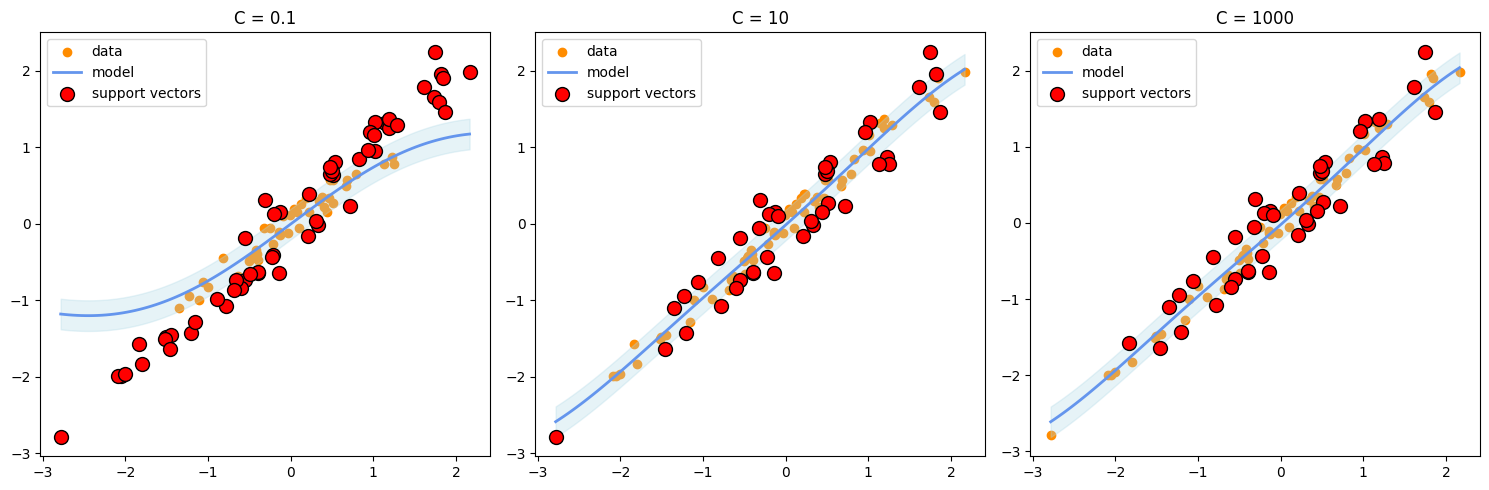

In [5]:
# ================================================
# 3. Regularization Parameter C Analysis
# ================================================

C_values = [0.1, 10, 1000]
plt.figure(figsize=(15, 5))

for i, C in enumerate(C_values):
    model = SVR(kernel='rbf', C=C, epsilon=0.2, gamma=0.1)
    model.fit(X_scaled, y_scaled)

    plt.subplot(1, 3, i+1)
    plot_svr(model, X_scaled, y_scaled, f"C = {C}")
    plt.tight_layout()

"""
Observations:
- Small C:
  - High regularization
  - Smoother decision function
  - More error tolerance

- Large C:
  - Low regularization
  - More complex functions
  - Risk of overfitting
"""



In [6]:
# ================================================
# 4. Mathematical Formulation
# ================================================

"""
Optimization Problem:
Minimize ½||w||² + CΣ(ξ_i + ξ_i*)
Subject to:
- y_i - (w·φ(x_i) + b) ≤ ε + ξ_i
- (w·φ(x_i) + b) - y_i ≤ ε + ξ_i*
- ξ_i, ξ_i* ≥ 0

Where:
- w: Weight vector
- φ: Kernel function
- ξ_i, ξ_i*: Slack variables for points above/below tube
- C: Regularization parameter
- ε: Epsilon-tube width
"""



'\nOptimization Problem:\nMinimize ½||w||² + CΣ(ξ_i + ξ_i*)\nSubject to:\n- y_i - (w·φ(x_i) + b) ≤ ε + ξ_i\n- (w·φ(x_i) + b) - y_i ≤ ε + ξ_i*\n- ξ_i, ξ_i* ≥ 0\n\nWhere:\n- w: Weight vector\n- φ: Kernel function\n- ξ_i, ξ_i*: Slack variables for points above/below tube\n- C: Regularization parameter\n- ε: Epsilon-tube width\n'

'\nKernel Comparison:\n1. Linear Kernel:\n   - Best for simple linear relationships\n   - Limited capacity for non-linear patterns\n\n2. RBF Kernel:\n   - Handles complex non-linear relationships\n   - Requires careful tuning of gamma parameter\n\n3. Polynomial Kernel:\n   - Captures polynomial relationships\n   - Degree parameter controls complexity\n'

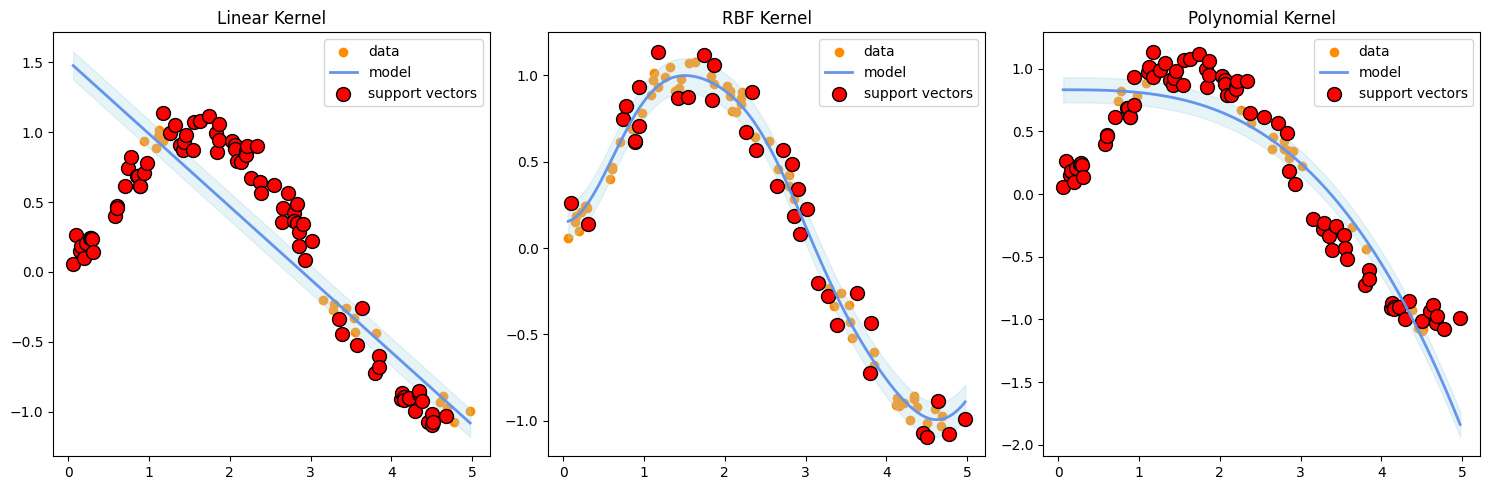

In [7]:
# ================================================
# 5. Non-linear Regression with Different Kernels
# ================================================

# Generate non-linear data
X_nonlin = np.sort(5 * np.random.rand(100, 1), axis=0)
y_nonlin = np.sin(X_nonlin).ravel() + np.random.normal(0, 0.1, X_nonlin.shape[0])

# Create SVR models with different kernels
kernels = {
    'Linear': SVR(kernel='linear', C=100, epsilon=0.1),
    'RBF': SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.5),
    'Polynomial': SVR(kernel='poly', C=100, epsilon=0.1, degree=3)
}

plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(kernels.items()):
    model.fit(X_nonlin, y_nonlin)
    plt.subplot(1, 3, i+1)
    plot_svr(model, X_nonlin, y_nonlin, f"{name} Kernel")
    plt.tight_layout()

"""
Kernel Comparison:
1. Linear Kernel:
   - Best for simple linear relationships
   - Limited capacity for non-linear patterns

2. RBF Kernel:
   - Handles complex non-linear relationships
   - Requires careful tuning of gamma parameter

3. Polynomial Kernel:
   - Captures polynomial relationships
   - Degree parameter controls complexity
"""



'\nGamma Observations:\n- Small gamma:\n  - Large similarity radius\n  - Smoother decision functions\n  - More global behavior\n\n- Large gamma:\n  - Small similarity radius\n  - More localized fits\n  - Risk of overfitting\n'

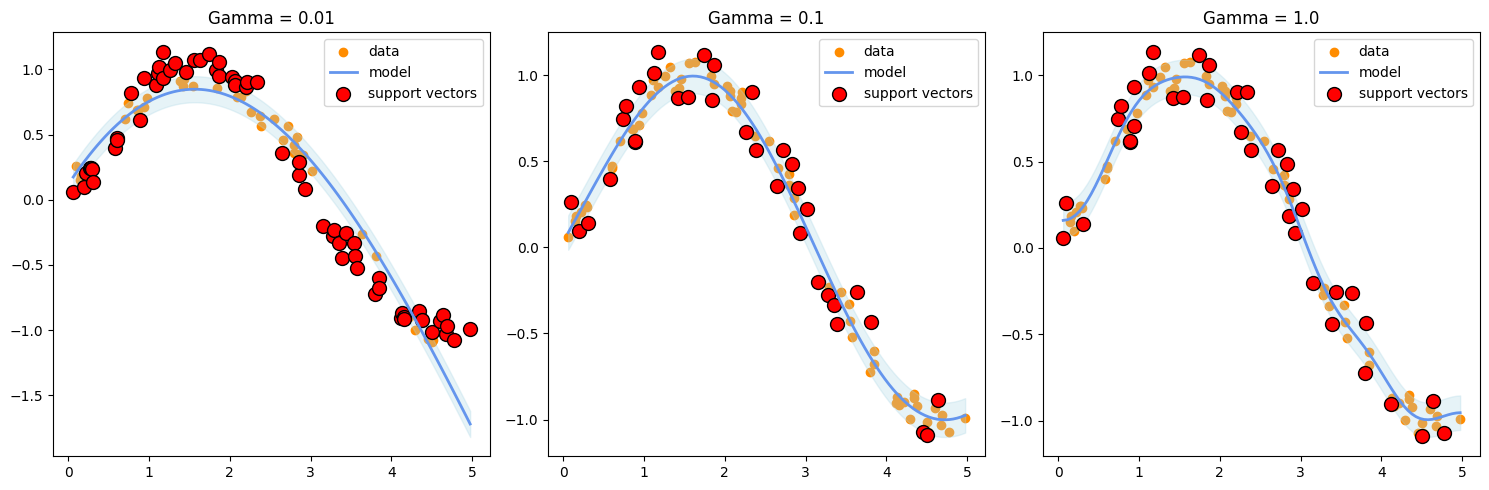

In [8]:
# ================================================
# 6. Gamma Parameter in RBF Kernel
# ================================================

gamma_values = [0.01, 0.1, 1.0]
plt.figure(figsize=(15, 5))

for i, gamma in enumerate(gamma_values):
    model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=gamma)
    model.fit(X_nonlin, y_nonlin)

    plt.subplot(1, 3, i+1)
    plot_svr(model, X_nonlin, y_nonlin, f"Gamma = {gamma}")
    plt.tight_layout()

"""
Gamma Observations:
- Small gamma:
  - Large similarity radius
  - Smoother decision functions
  - More global behavior

- Large gamma:
  - Small similarity radius
  - More localized fits
  - Risk of overfitting
"""



In [9]:
# ================================================
# 7. Complete Workflow with Real Data
# ================================================

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV


# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Cross Validation
C = [0.01, 0.1, 1, 10]
epsilon =[0.01, 0.1, 1]
gamma = [0.01, 0.1, 1]
param_grid = {'C':C, 'epsilon':epsilon, 'gamma':gamma}
svr = SVR(kernel='rbf')
# Train and evaluate SVR
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
# Evaluate performance
best_svr = grid_search.best_estimator_
train_pred = best_svr.predict(X_train_scaled)
test_pred = best_svr.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

"""
Practical Considerations:
- Feature scaling is crucial for SVR
- High-dimensional data may require dimensionality reduction
- Parameter tuning (C, ε, gamma) is essential for good performance
- Computational complexity increases with number of support vectors
"""

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 1}
Train MSE: 0.16937988888320318
Test MSE: 0.3139917951791932


'\nPractical Considerations:\n- Feature scaling is crucial for SVR\n- High-dimensional data may require dimensionality reduction\n- Parameter tuning (C, ε, gamma) is essential for good performance\n- Computational complexity increases with number of support vectors\n'

ValueError: X has 1 features, but SVR is expecting 8 features as input.

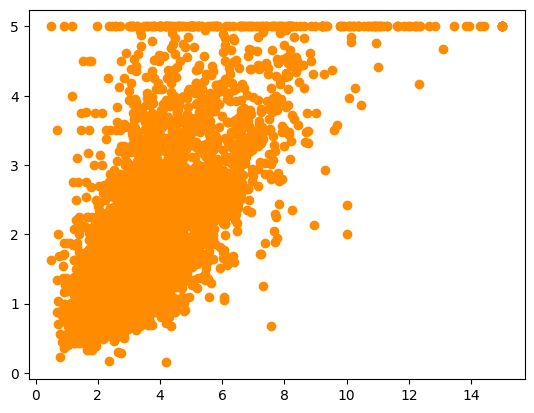

In [10]:
#visualize the best fit model
plt.scatter(X_test[:, 0], y_test, color='darkorange', label='data')
x_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = best_svr.predict(x_test)
plt.plot(x_test, y_pred, color='cornflowerblue', label='model', linewidth=2)
plt.title("Best Fit SVR Model")
plt.legend()
plt.show()